# Spam classification using logistic regression

###### Consider the email spam data set discussed on p300 of (Hastie et al. 2009). This consists of 4601 email messages, from which 57 features have been extracted. These are as follows:

• 48 features, in [0, 100], giving the percentage of words in a given message which match a given word
on the list. The list contains words such as “business”, “free”, “george”, etc. (The data was collected by
George Forman, so his name occurs quite a lot.)

• 6 features, in [0, 100], giving the percentage of characters in the email that match a given character on the list. 

• Feature 55: The average length of an uninterrupted sequence of capital letters (max is 40.3, mean is 4.9)

• Feature 56: The length of the longest uninterrupted sequence of capital letters (max is 45.0, mean is 52.6)

• Feature 57: The sum of the lengts of uninterrupted sequence of capital letters (max is 25.6, mean is 282.2)

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import pandas as pd

In [ ]:
X_train = pd.read_csv("x_train.csv", header = None)
Y_train = pd.read_csv("y_train.csv", header = None)
X_test = pd.read_csv("x_test.csv", header = None)
Y_test = pd.read_csv("y_test.csv", header = None)

In [4]:
x_train=np.asarray(X_train)
y_train=np.asarray(Y_train)
x_test=np.asarray(X_test)
y_test=np.asarray(Y_test)

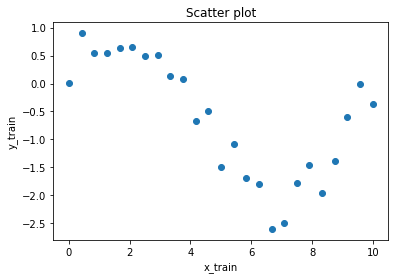

In [5]:
p = plt.scatter(x_train, y_train)
plt.title('Scatter plot')
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.show()

In [6]:
p1 = []
for i in range(25):
    p1.append([1])
p2 = []
for i in range(48):
    p2.append([1])

###### Implementing Polynomial regression

In [7]:
def polynomial_regression(X,Y,p): #Function to find Polynomial regression weights and MSE for various degrees
    degree = [1,2,3,7,10]
    temp=[]
    MSE=[]
    weights = {}
    mse = {}
    i= 0
    d=0
    for i in range(len(degree)):
        d = degree[i]
        mid = np.concatenate([p,X], axis =1)
        if d != 1:
            for j in range(2,d+1):
                mid = np.concatenate([mid,np.power(X,j)], axis = 1)
        temp = mid  
        temp_t = temp.transpose()
        temp_t1 = np.matmul(temp_t,temp)
        temp_inv = np.linalg.inv(temp_t1)
        temp_1 = np.matmul(temp_inv,temp_t)
        weights[d] = np.matmul(temp_1,Y)
        print(weights[d])
        mid_2 = np.linalg.norm(Y-(np.matmul(temp,weights[d])),2)
        mse[d]=np.mean(mid_2)
        print(mse[d])
        MSE = np.append(MSE,mse[d])
    print(MSE)
    plt.plot(MSE, degree ,color='green', linestyle='dashed', linewidth = 2)
    plt.xlabel("mean square error")
    plt.ylabel("Polynomials in x of degree")
    plt.title("Error vs. Polynomial degree")
    plt.show()
    

[[ 0.55787413]
 [-0.23494215]]
3.9750615860196423
[[ 1.40766343]
 [-0.76698414]
 [ 0.0532042 ]]
3.348019470031121
[[ 0.18301369]
 [ 0.87201349]
 [-0.36501611]
 [ 0.02788135]]
1.593622527755886
[[ 1.39650721e-01]
 [ 1.39453740e+00]
 [-1.22891449e+00]
 [ 5.21807648e-01]
 [-1.25503235e-01]
 [ 1.52807329e-02]
 [-8.47085336e-04]
 [ 1.60809553e-05]]
1.299985949906664
[[ 1.05708063e-02]
 [ 6.55098286e+00]
 [-1.64896424e+01]
 [ 1.80784638e+01]
 [-1.06493229e+01]
 [ 3.72359865e+00]
 [-8.11055351e-01]
 [ 1.11111709e-01]
 [-9.30208754e-03]
 [ 4.34549559e-04]
 [-8.67645676e-06]]
1.094422820613233
[3.97506159 3.34801947 1.59362253 1.29998595 1.09442282]


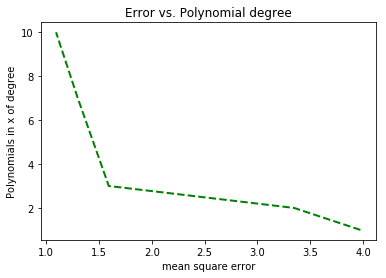

In [8]:
polynomial_regression(x_train,y_train,p1) #Polynomial regression with train data 

###### Mean square error is decreasing as the polynomial degree is increasing for the training set

[[ 0.87515848]
 [-0.30587031]]
5.528927889774566
[[ 1.94713969]
 [-0.92529419]
 [ 0.06077749]]
4.554119572896799
[[ 0.16270074]
 [ 1.08079466]
 [-0.42665391]
 [ 0.03188431]]
1.8488249616564938
[[-1.05835641e-01]
 [ 1.47331797e+00]
 [-5.06805907e-01]
 [ 4.77172205e-03]
 [ 1.10805880e-02]
 [-1.46995487e-03]
 [ 9.37056919e-05]
 [-2.63369578e-06]]
1.714404815559517
[[-7.77759901e-01]
 [ 6.08101057e+00]
 [-9.82731740e+00]
 [ 8.76384289e+00]
 [-4.54082487e+00]
 [ 1.42508266e+00]
 [-2.80740913e-01]
 [ 3.49676792e-02]
 [-2.67391885e-03]
 [ 1.14586493e-04]
 [-2.10717424e-06]]
1.6950634443569987
[5.52892789 4.55411957 1.84882496 1.71440482 1.69506344]


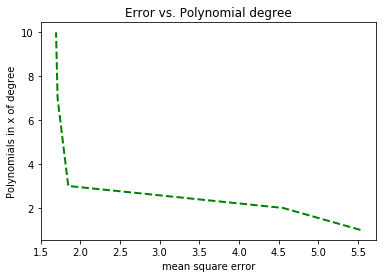

In [9]:
polynomial_regression(x_test,y_test,p2) #Polynomial regression for test data with weights and MSE

MSE almost remains same till the polynomial degree is between 5 to 10 

In [47]:
def ridge_regression(x,y,p): #Function for calculating Ridge Regression weights and MSE 
    l=[0.00001, 0.001,0.1,1,10]
    weight =[]
    MSE_ridge = []
    log_lambda = []
    mse_ridge={}
    for i in range(len(l)):
        log_lambda = np.append(log_lambda,np.math.log10(l[i]))
        I = np.identity(8, dtype = float)
        lim = l[i]*I
        cat = np.concatenate([p,x], axis =1)
        for j in range(2,8):
            cat = np.concatenate([cat,np.power(x,j)], axis = 1)
        temp1 = cat
        temp_t2 = temp1.transpose()
        temp_t22 = np.matmul(temp_t2, temp1)
        som = lim + temp_t22
        som_inv = np.linalg.inv(som)
        som_mid = np.matmul(temp_t2,y)
        weight = np.matmul(som_inv,som_mid)
        print(weight)
        cat_2 = np.linalg.norm(y-(np.matmul(temp1,weight)),2)
        mse_ridge[i]=np.mean(cat_2)
        MSE_ridge = np.append(MSE_ridge,mse_ridge[i]) 
        print(MSE_ridge)
    print(log_lambda)
    plt.plot(MSE_ridge, log_lambda,color='green', linestyle='dashed', linewidth = 2)
    plt.xlabel("mean square error")
    plt.ylabel("Log Lambda")
    plt.title("Error vs. Log Lambda with polynomial degree 7")
    plt.show()

[[ 1.39723157e-01]
 [ 1.39401411e+00]
 [-1.22822869e+00]
 [ 5.21447182e-01]
 [-1.25409418e-01]
 [ 1.52678881e-02]
 [-8.46199032e-04]
 [ 1.60566585e-05]]
[1.29998596]
[[ 1.46572092e-01]
 [ 1.34468116e+00]
 [-1.16360351e+00]
 [ 4.87488441e-01]
 [-1.16572802e-01]
 [ 1.40582143e-02]
 [-7.62739109e-04]
 [ 1.37689156e-05]]
[1.29998596 1.30004741]
[[ 2.67755127e-01]
 [ 5.05409134e-01]
 [-1.02239080e-01]
 [-5.65926088e-02]
 [ 2.24703575e-02]
 [-4.71641852e-03]
 [ 5.18727322e-04]
 [-2.10549265e-05]]
[1.29998596 1.30004741 1.31885346]
[[ 2.83302392e-01]
 [ 2.51242700e-01]
 [ 6.83721530e-02]
 [-7.68300119e-02]
 [ 1.41197191e-02]
 [-2.14577216e-03]
 [ 2.64068831e-04]
 [-1.23729063e-05]]
[1.29998596 1.30004741 1.31885346 1.34157007]
[[ 1.30648926e-01]
 [ 1.07289568e-01]
 [ 7.77265362e-02]
 [ 2.03327707e-02]
 [-3.10453464e-02]
 [ 6.03166175e-03]
 [-4.02835142e-04]
 [ 8.05983981e-06]]
[1.29998596 1.30004741 1.31885346 1.34157007 1.48291871]
[-5. -3. -1.  0.  1.]


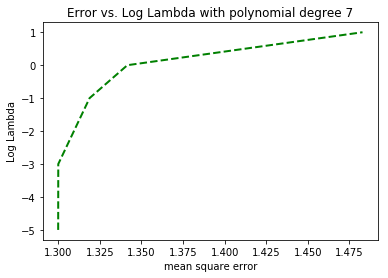

In [48]:
ridge_regression(x_train,y_train,p1) # Ridge regression using train data

MSE remains same for lower value of lambda but for higher values it increases linearly for training data

[[-1.05673594e-01]
 [ 1.47272630e+00]
 [-5.06172502e-01]
 [ 4.47037877e-03]
 [ 1.11545324e-02]
 [-1.47969946e-03]
 [ 9.43607365e-05]
 [-2.65132479e-06]]
[1.71440482]
[[-9.07252884e-02]
 [ 1.41808071e+00]
 [-4.47741776e-01]
 [-2.33030744e-02]
 [ 1.79651024e-02]
 [-2.37675392e-03]
 [ 1.54637456e-04]
 [-4.27299787e-06]]
[1.71440482 1.71443555]
[[ 1.29936691e-01]
 [ 7.10146987e-01]
 [ 2.28953159e-01]
 [-3.17152120e-01]
 [ 8.49102589e-02]
 [-1.06732973e-02]
 [ 6.84268217e-04]
 [-1.79126985e-05]]
[1.71440482 1.71443555 1.72122765]
[[ 2.83042537e-01]
 [ 4.26793013e-01]
 [ 2.05373605e-01]
 [-1.82968839e-01]
 [ 2.85712382e-02]
 [-8.17235325e-04]
 [-1.09683704e-04]
 [ 6.35208251e-06]]
[1.71440482 1.71443555 1.72122765 1.75916219]
[[ 2.05583803e-01]
 [ 2.02358372e-01]
 [ 1.43087844e-01]
 [ 8.02849290e-03]
 [-5.15486079e-02]
 [ 1.32713624e-02]
 [-1.24808082e-03]
 [ 4.11886760e-05]]
[1.71440482 1.71443555 1.72122765 1.75916219 1.97646431]
[-5. -3. -1.  0.  1.]


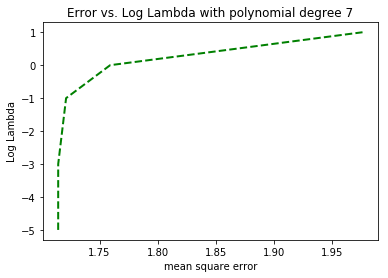

In [49]:
ridge_regression(x_test,y_test,p2) #Ridge_regression using test data

The MSE for both test and train data remains same and the best Log-lambda value is -5 to -3. Later MSE starts increasing linearly as log lambda increases.